# Exercise 1

We first load a dataset and examine its dimensions.

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)


(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

Text(0, 0.5, 'y')

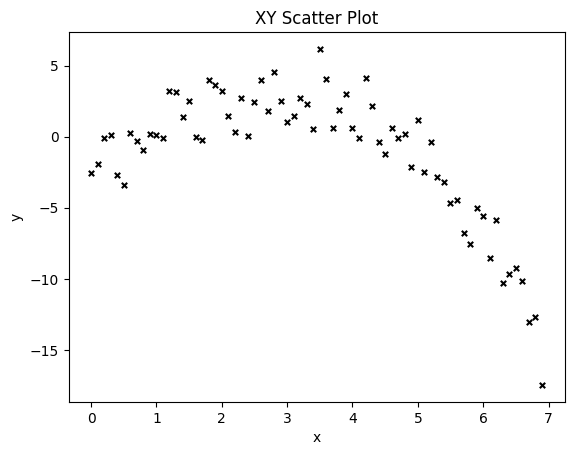

In [23]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1)

ax.scatter(xy_data[:,0], xy_data[:,1],
           s=15, marker='x',color='black')

ax.set_title('XY Scatter Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')



### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [83]:
def polyreg(data_matrix, k):
        
    xvals = data_matrix[:,0]
    yvals = data_matrix[:,1]
    
    Xk = np.column_stack(tuple([np.ones(xvals.shape)] + 
                               [xvals**i for i in range(1,k+1)]))
        
    beta_vec = np.linalg.lstsq(Xk, yvals)[0]
    fit = Xk.dot(beta_vec)
    residuals = yvals - fit
    
    return beta_vec, fit, residuals



Use the tests below to check the outputs of the function you have written:

In [82]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))

beta_test = polyreg(test_matrix, k=2)[0] 

print(beta_test)
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

[ 2. -7.  3.]


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

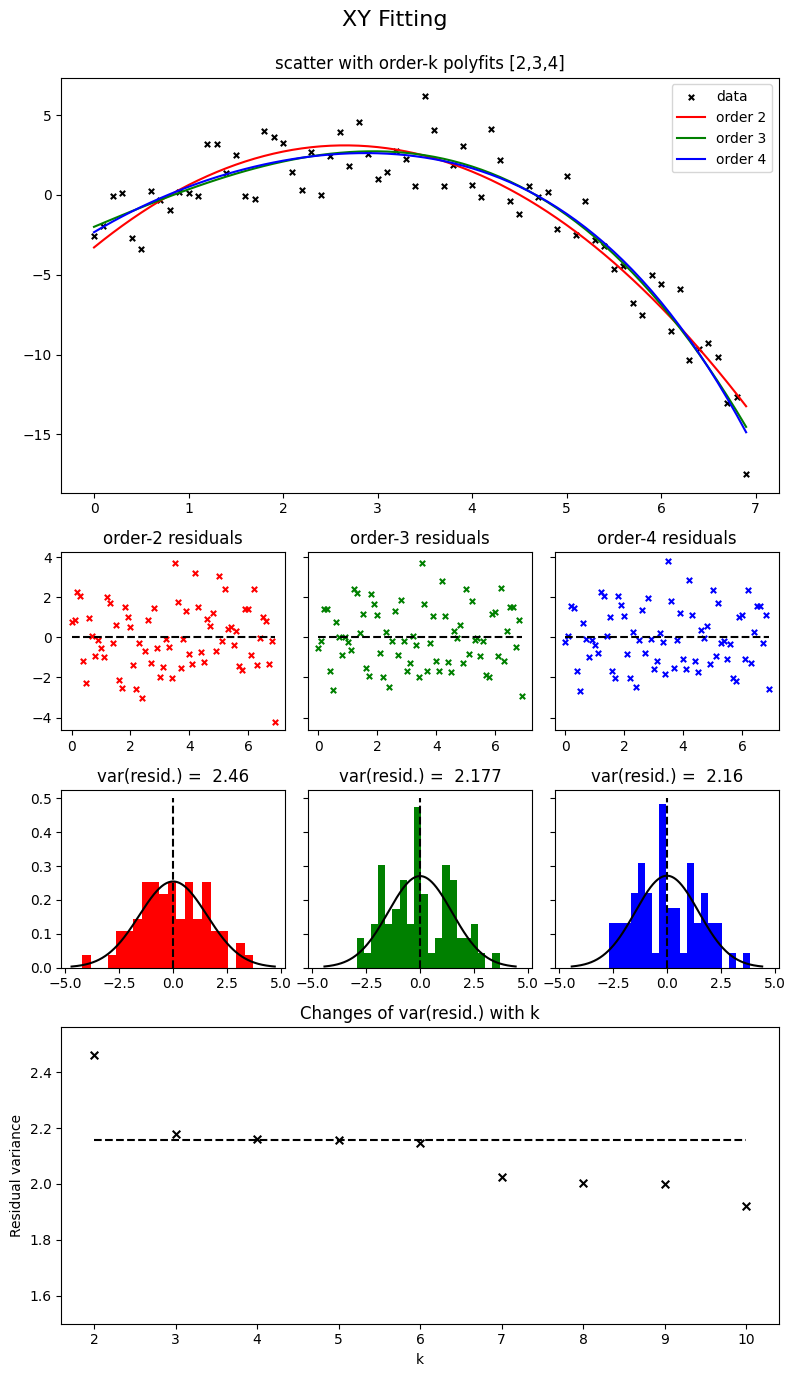

In [282]:
from scipy.stats import norm


fig = plt.figure(figsize=(8, 14))
spec = fig.add_gridspec(11, 3)

ax0 = fig.add_subplot(spec[0:4, :])

ax10 = fig.add_subplot(spec[4:6, 0])
ax11 = fig.add_subplot(spec[4:6, 1])
ax12 = fig.add_subplot(spec[4:6, 2])

ax20 = fig.add_subplot(spec[6:8, 0])
ax21 = fig.add_subplot(spec[6:8, 1])
ax22 = fig.add_subplot(spec[6:8, 2])

ax3 = fig.add_subplot(spec[8:12, :])

ax20.sharey(ax21)
ax21.sharey(ax22)
ax20.sharex(ax21)
ax21.sharex(ax22)

ax10.sharey(ax11)
ax11.sharey(ax12)
ax10.sharex(ax11)
ax11.sharex(ax12)

ax11.tick_params(labelleft=False)
ax12.tick_params(labelleft=False)

ax21.tick_params(labelleft=False)
ax22.tick_params(labelleft=False)

fig.suptitle(f'XY Fitting\n', fontsize=16)
klist = [2,3,4]
k2list = [2,3,4,5,6,7,8,9,10]


clist = ['red', 'green', 'blue']

m_axs = [ax10, ax11, ax12]
b_axs = [ax20, ax21, ax22]

ax0.scatter(xy_data[:,0], xy_data[:,1],
           s=15, marker='x',color='black',
               label='data')

ax0.set_title('scatter with order-k polyfits [2,3,4]')

for i,k in enumerate(klist):
    
    ## k-order polyfit lines
    ax0.plot(xy_data[:,0], polyreg(xy_data,k)[1],
            label=f'order {k}', color=clist[i])
    
    ## residual scatter plots
    
    k_residuals = polyreg(xy_data,k)[2]
    m_axs[i].scatter(xy_data[:,0], k_residuals, 
                     color=clist[i], marker='x',s=15)
    m_axs[i].set_title(f'order-{k} residuals')
    
    m_axs[i].plot([xy_data[:,0][0], xy_data[:,0][-1]],[0,0],
                  color='black', linestyle='--')
    
    ### histograms and gaussian distributions

    b_axs[i].hist(k_residuals, bins=20, density=True, facecolor=clist[i])
    b_axs[i].set_title(f'var(resid.) =  {np.round(np.var(k_residuals),3)}')
    
    local_std = np.std(k_residuals)
    hist_x = np.linspace(-3*local_std, 3*local_std, 1000)
    
    b_axs[i].plot(hist_x, norm.pdf(hist_x, loc=0, scale=local_std), 'black')
    b_axs[i].plot([0, 0],[0, 0.5], color='black', linestyle='--')
    

ax0.legend()
kvars = np.array([np.var(polyreg(xy_data,k)[2]) for k in k2list])

ax3.scatter(np.array(k2list), kvars,
            color='black', marker='x', s=30)

ax3.plot([min(k2list), max(k2list)], [kvars[3],kvars[3]],
         color='black', linestyle='--')

ax3.set_ylim(1.5,max(kvars)+0.1)
ax3.set_ylabel('Residual variance')
ax3.set_xlabel('k')
ax3.set_title('Changes of var(resid.) with k')

fig.tight_layout(h_pad=1)

fig.savefig('Ex1.png')


Variance of residuals is smallest with $k=4$






 
 
 